In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer


In [127]:
# Loading the labelled data
labelled = pd.read_csv('/home/peo23/ads-deluge-jubilee/flood_tool/resources/postcodes_labelled.csv')


In [128]:
# Exploring the data
labelled.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20,River Avon,1240.0,Bath and North East Somerset,5,621800.0,1
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20,River Avon,1550.0,Bath and North East Somerset,3,577900.0,0
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20,River Avon,1540.0,Bath and North East Somerset,5,533300.0,1
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30,River Avon,1450.0,Bath and North East Somerset,1,563600.0,0
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30,River Avon,1410.0,Bath and North East Somerset,1,570800.0,0


In [129]:
#Checking for duplicates
labelled.duplicated().sum()

0

In [130]:
#Checking for missing values
labelled.isna().sum()

postcode                     0
easting                      0
northing                     0
soilType                     0
elevation                    0
nearestWatercourse       30091
distanceToWatercourse        0
localAuthority               0
riskLabel                    0
medianPrice               6202
historicallyFlooded          0
dtype: int64

In [131]:
labelled.shape

(80000, 11)

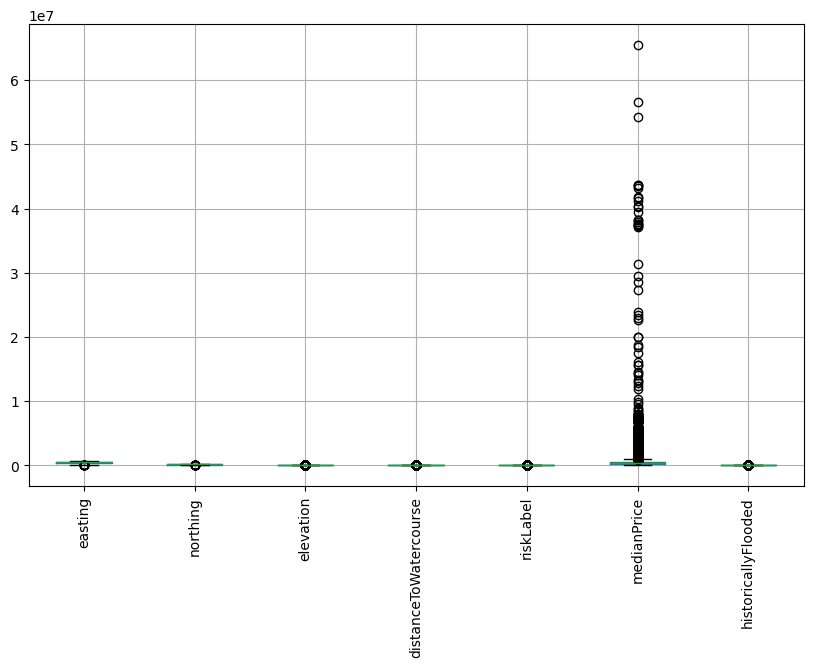

In [132]:
figure = plt.figure(figsize=(10, 6))
labelled.boxplot()
plt.xticks(rotation=90)
plt.show()

In [133]:
labelled.describe()

,easting,northing,elevation,distanceToWatercourse,riskLabel,medianPrice,historicallyFlooded
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,7.379800e+04,80000.000000
mean,449902.946163,136927.660150,54.313500,1500.407625,1.669450,5.141523e+05,0.028125
std,108562.603117,38481.390032,43.631669,1517.951230,1.187615,9.093642e+05,0.165331
min,88849.000000,10216.000000,-10.000000,0.000000,1.000000,1.000000e+02,0.000000
25%,369302.750000,106788.500000,20.000000,630.000000,1.000000,2.924000e+05,0.000000
50%,476828.000000,149094.000000,40.000000,1090.000000,1.000000,3.984000e+05,0.000000
75%,530845.000000,169500.000000,80.000000,1840.000000,2.000000,5.649750e+05,0.000000
max,639867.000000,212063.000000,430.000000,47630.000000,7.000000,6.540120e+07,1.000000


In [134]:
labelled.dtypes

postcode                  object
easting                    int64
northing                   int64
soilType                  object
elevation                  int64
nearestWatercourse        object
distanceToWatercourse    float64
localAuthority            object
riskLabel                  int64
medianPrice              float64
historicallyFlooded        int64
dtype: object

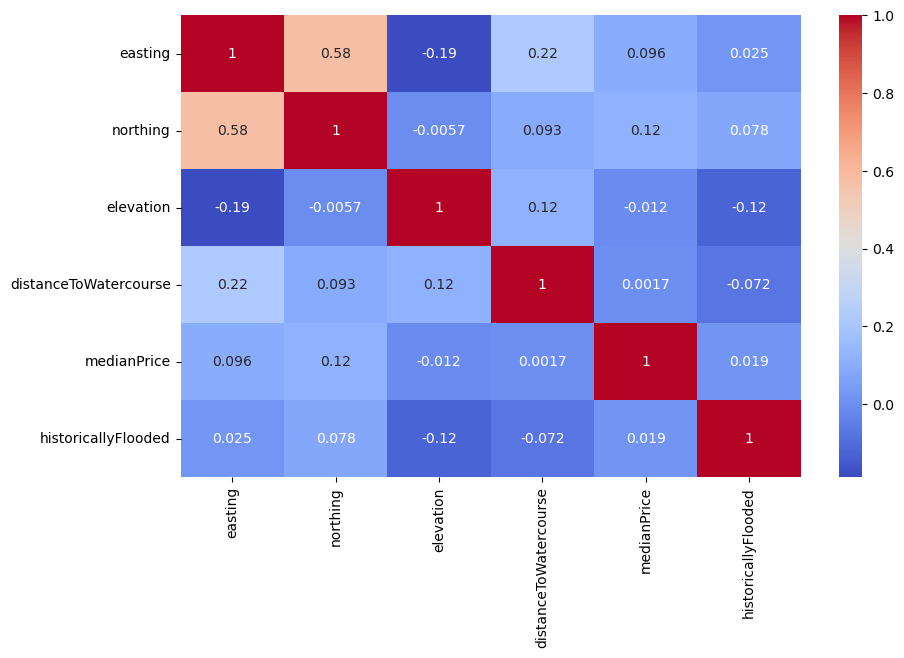

In [135]:
corr = labelled[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

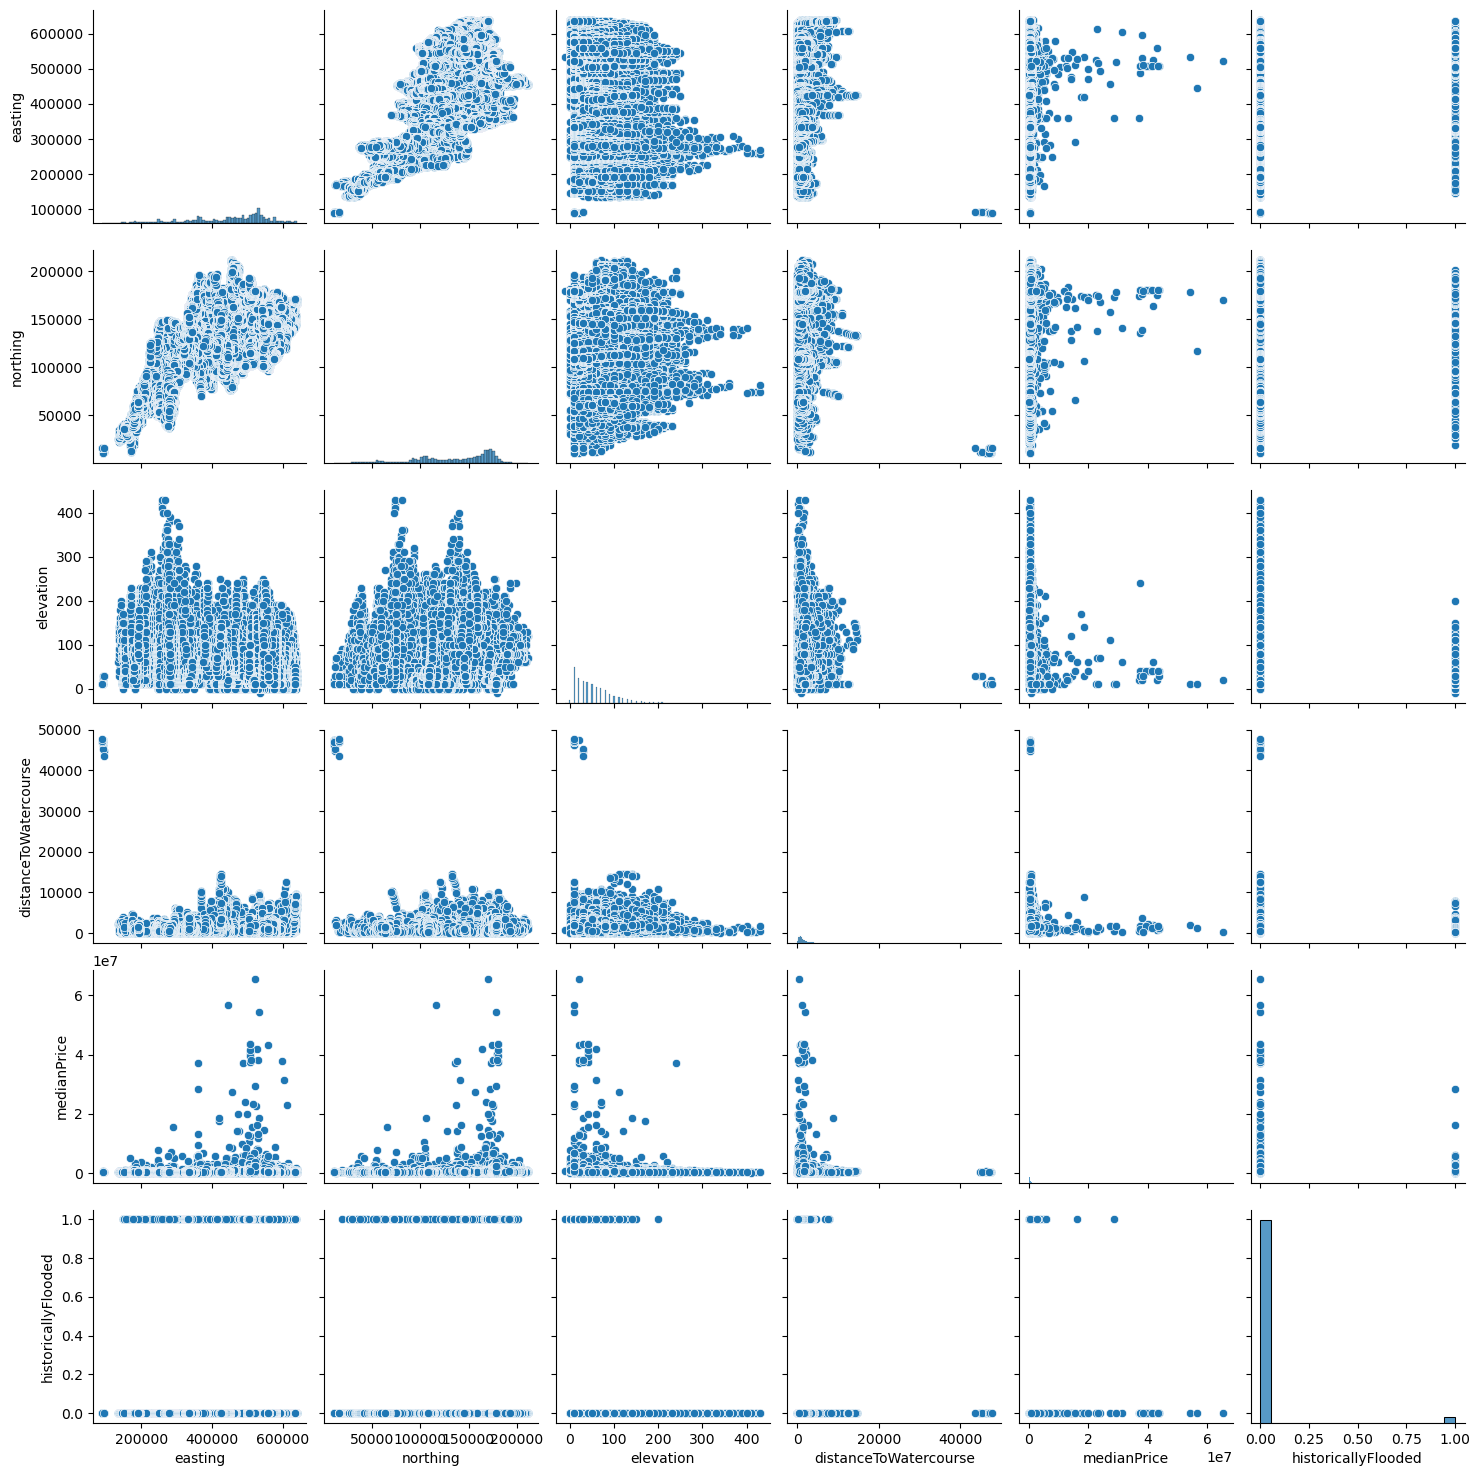

In [136]:
sns.pairplot(labelled[num_cols])
plt.show()

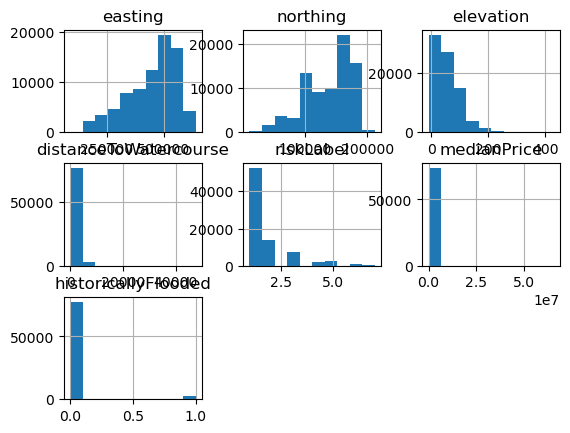

In [137]:
labelled.hist()
plt.show()

In [138]:
#Transforming the data

from sklearn.preprocessing import FunctionTransformer
import numpy as np

def log_function(x):
    return np.log1p(x)  # np.log1p adds 1 to handle log(0)

log_custom = FunctionTransformer(log_function, feature_names_out='one-to-one')

# Step3: Specify the columns that need the log transformation
log_transform_cols = ['distanceToWatercourse', 'historicallyFlooded', 'medianPrice']


# Step 4: create a custom_pipe:
log_transformer = Pipeline([ 
    ('log_transform', log_custom)
])


In [139]:
y = labelled['riskLabel']
X = labelled.drop(columns=['riskLabel'])

In [140]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [142]:
gen_pipeline = Pipeline([
            ('scaler', RobustScaler()),
        ])
scale_column = ['medianPrice']

In [143]:
cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

In [151]:
preprocessor = ColumnTransformer([
    ('gen', gen_pipeline, scale_column ),
    ('log', log_transformer, num_cols.difference(scale_column)),
        ('cat', cat_pipeline, cat_cols.drop(['postcode', 'nearestWatercourse'])),
])

In [152]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

/home/peo23/downloads/cd/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
